In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Pick a number between 1 - 100
The number you pick would be the weirdness level. The greater the number, the weirder you are.

The instructor's number is 85. Is the weirdness level 85 come from the population (the students in classroom)?

## Testing Hypothesis
#### Step 1: The Hypotheses
* Null hypothesis: The instructor weirdness is randomly chosen from the population of Data 8
* Alternative hypothesis: It's not.

#### Step 2: The Test Statistic
Weirdness(higher number means more weird)

#### Step 3: The Sampling Distribution of the Test Statistic
* Look at the classroom
* Ask the students one by one each of their weirdness level

# [The 2 Hypotheses: Mendel's Pea Flower](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models) (Inferential Thinking - 11.1)
[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) was an Austrian monk known as the founder of the modern field of genetics. He performed careful and large-scale experiments on plants to come up with fundamental laws of genetics.

Many of Mendel's experiments were on varieties of pea plants. He formulated sets of assumptions about each variety (**these were his models**). He then tested the validity of his models by growing the plants and gathering data.

In a particular variety, each plant has either purple or white flowers. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plant should bear purple or white flowers at random, in the ratio 3:1.

### Mendel's Model: For every plant, there's a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all other plants.

#### Approach to Assessment
To assess this model, we can simulate plants under the assumptions of the model and see what it predicts. This way we'll be able to compare the predictions with the data that Mendel recorded.

### The Statistic: distance between the sample % of purple-flowered plants and 75%
Our goal is to see whether Mendel's model is good. If the model's good, the % of purple-flowered plants in the sample should be close to 75%. If the model is not good, it should be far greater or lower than 75%.

The key is the **distance** between the hypothetical 75% and the % of purple-flowered plants in the sample. Big distances would be evidence that the model isn't good.

**Distance = | % sample of purple-flowered plants - 75 |**

## Predicting the Statistic Under the Model
To approximate the distance if Mendel's model were true, we can use `sample_proportions` to simulate the distance under the assumptions of the model.

First, determine how many times we need to sample. We should simulate the same number of plants Mendel had. He had 929 plants of the variety corresponding to this model, so we would need to sample 929 times.

### Generating one value of the statistic
Steps:
* Sample 929 times at random from the distribution specified by the model and obtain the sample proportion of the purple-flowering category
* Multiply the proportion by 100 to get %
* Subtract by 75 and take the absolute value of the difference

In [2]:
#Simulate one value of the distance
model_proportions = [0.75, 0.25]
abs(100 * sample_proportions(929, model_proportions).item(0) - 75)

0.026910656620017903

Above is the result of calculating one value. To find out how much the distance would vary, we need to simulate it multiple times.

In [3]:
# Simulate 10,000 times
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs(100 * sample_proportions(929, model_proportions).item(0) - 75)
    distances = np.append(distances, one_distance)

## The Prediction
The empirical histogram of the simulated values shows the distribution of the distance as predicted by the model

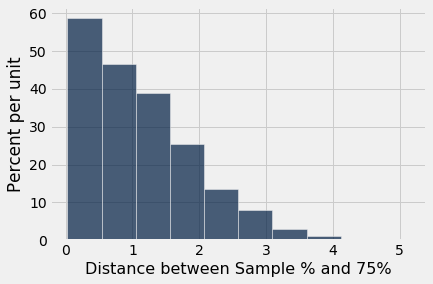

In [4]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()

From the horizontal axis, we can see the typical values of the distance. A high proportion of the distances are in the range of 0 to 1, meaning that for a high proportion of the samples, the % of purple-flowered plants is around 74-76%.

## Compare Prediction and Data
To assess the model, we need to compare this prediction with the data. Mendel recorded the number of purple and white flowering plants. Among 929 plants, 705 were purple-flowered. 

In [5]:
705 / 929

0.7588805166846071

So the observed value of our statistic - the distance between Mendel's sample % and 75, is about 0.89

In [6]:
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

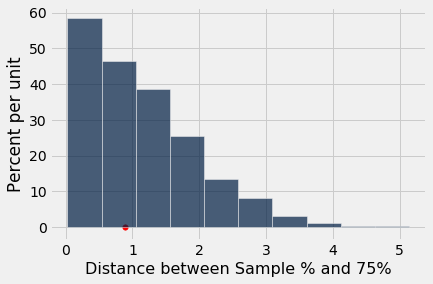

In [7]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.scatter(observed_statistic, 0, color='red', s=30);

By visually looking at the histogram above, we can see that 0.89 is within the range from 0 to 1. The data are consistent with the histogram that we generated under the assumptions of Mendel's model. This is evidence in favor of the model.

## Video Lecture Version - Pea Flowers

The null hypothesis is 3:1 ratio of purple to white flowers.

In [8]:
null = make_array('Purple', 'Purple', 'Purple', 'White')
null

array(['Purple', 'Purple', 'Purple', 'White'], dtype='<U6')

Now take a sample of size 10 from the `null` array.

In [9]:
sample = np.random.choice(null, 10)
sample

array(['Purple', 'Purple', 'Purple', 'White', 'Purple', 'White', 'Purple',
       'Purple', 'White', 'Purple'], dtype='<U6')

We'll calculate how many of the above are purple.

In [10]:
np.count_nonzero(sample == 'Purple')

7

To get the proportion, divide the value above by 10.

In [11]:
np.count_nonzero(sample == 'Purple') / 10

0.7

Mendel proposes that the proportion above should be 0.75. Therefore, we can calculate how different the result that we got above from Mendel's theory. The greater the result, the greater the difference.

In [12]:
abs(np.count_nonzero(sample == 'Purple') / len(sample) - 0.75)

0.050000000000000044

Below we're going to define the test statistic function:

In [13]:
# The 'sample' input is an array of flower colors, just like the 'null'
def test_stat(sample):
    #prop_purple stands for proportion of purple flowered plants
    prop_purple = abs(np.count_nonzero(sample == 'Purple')
                      / len(sample)
                      - 0.75)
    return prop_purple

In [14]:
#test with an array that only contains a purple flower

In [15]:
test_stat(make_array('Purple'))

0.25

From Mendel's experiment, 705 out of 929 plants were purple.

In [16]:
observed = 705/929
observed_statistic = abs(observed-0.75) # Calculate the distance
observed_statistic

0.008880516684607098

In our case, we also want to take 929 samples!

In [17]:
sample_array = np.random.choice(null, 929)
sample_array

array(['Purple', 'Purple', 'White', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'White', 'White', 'Purple',
       'White', 'Purple', 'Purple', 'White', 'White', 'Purple', 'Purple',
       'Purple', 'White', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'White', 'White', 'White', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'White', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple', 'Purple', 'Purple', 'Purple', 'White', 'White', 'White',
       'Purple', 'Purple', 'P

In [18]:
# Using the 929 sample array above, we calculate one value of the test statistic
test_stat(sample_array)

0.027179763186221728

Now repeat the steps above multiple times.

In [19]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, 929))
    sample_stats = np.append(sample_stats, stat)
    
sample_stats

array([0.00888052, 0.00618945, 0.00349839, ..., 0.01372443, 0.00026911,
       0.00618945])

In [20]:
# Make a table out of the test statistic values that you calculated above
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist

Null distribution
0.00888052
0.00618945
0.00349839
0.00726588
0.0148009
0.0158773
0.00565124
0.00296017
0.0244887
0.00726588


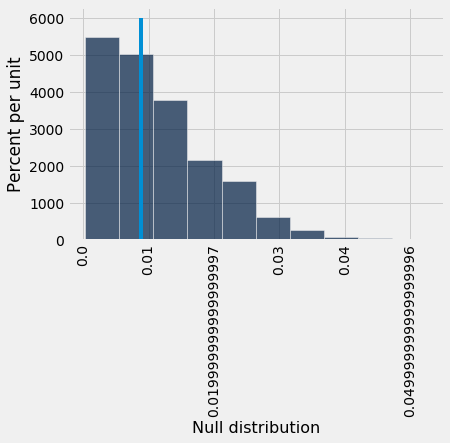

In [21]:
# And make a histogram out of it!
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

If Mendel's model was correct, the typical test statistic value should be between 0 to 0.04 (see above). Mendel's experiment result is shown with the blue line, which implies that we have evidence in favor to Mendel's model.

Now let's say we tried Mendel's experiment and got a test statistic of 0.03

In [22]:
our_test_statistic = 0.03 

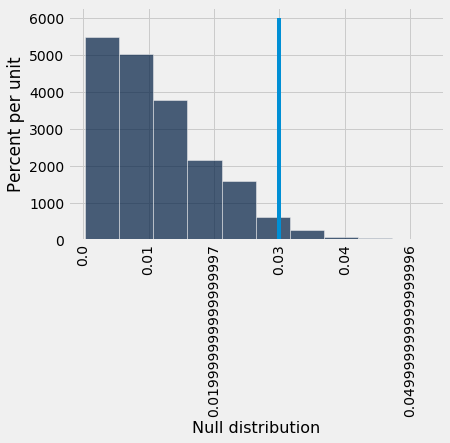

In [23]:
null_dist.hist()
_ = plt.plot([our_test_statistic, our_test_statistic], [0, 60])

## P-values
With `our_test_statistic`, do we reject Mendel's hypothesis, or do we accept it?

Below we count the number of sample test statistics that are higher than the observed (obtained from Mendel's actual experiment) test statistic.

In [24]:
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

0.5454

and below we count the number of sample test statistics that are higher than `our_experiment` test statistic.

In [25]:
np.count_nonzero(sample_stats >= our_test_statistic) / len(sample_stats)

0.0296

The 2 numbers we called above are a probability called **p-value**

## Conclusion of a Test
Choosing between null vs. alternative hypotheses:
* Compare the observed test statistic to its empirical distribution under the null hypothesis. If the observed value is:
    * **inconsistent** with the distribution, then **reject the null hypothesis**, leaving only the alternative
    * **consistent** with the distribution, then the test does not support the alternative hypothesis

How do we tell if a value is consistent with a distribution?
* A visualization may be sufficient
* Convention: the observed significance level (P-value)

### Definition of P-Value

P-value is the **chance** under the **null hypothesis** that the **test statistic** is equal to the value that was observed in the data or is even further in the direction of the alternative.

## Conventions of Consistency
* **Inconsistent**: The test statistic is in the tail of the null distribution
* **In the tail** first convention:
    * The area in the tail is less than 5%
    * The result is "statistically significant"
* **In the tail** 2nd convention:
    * The area in the tail is less than 1%
    * The result is "highly statistically significnat"

Sir Ronald Fisher, 1925

**"It is convenient to take this point [5%] as a limit in judging whether a deviation is to be considered significant or not." **- Statistical Methods for Research Workers

1926
" If one in 20 does not seem high enough odds, we may, if we prefer it, draw the line at one in 50 (the 2 % point), or one in 100 (the 1 % point). Personally, the author prefers to set a low standard of significance at the 5 % point..."

## The GSI's Defense (Inferential Thinking)
A Berkeley Statistics class of about 350 students was divided into 12 sections led by Graduate Student Instructors (GSIs). After the midterm, students in Section 3 complained that their scores were on average lower than the rest of the class.

The GSI, typically more experienced about statistical variation, often has a different perspective: **if you simply draw a section of students at random from the whole class, their average score could resemble the score that the students are unhappy about**.

The GSI's position is a clearly stated chance model. We can simulate the data under this model.

**Null Hypothesis**: The average score of the students in Section 3 is like the average score of the same number of students picked at random from the class.

**Alternative Hypothesis**: No, it's too low

The natural statistic here is **the average of the scores**. Low values of the average will favor the alternative hypothesis.

The table `scores` contains the section number and midterm score for each student in the class. The midterm scores were integers in the range 0 through 25 (0 means the student didn't take the test).

In [26]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


To find the average score in each section, use `group`.

In [27]:
section_averages = scores.group('Section', np.average)
section_averages.show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


The average of Section of 3 is 13.6667, which indeed looks lower compared to the other section averages. However, is it lower than the average of a section of the same size selected at random from the class?

To solve this, we can select a section at random from the class and find its average. To select a section at random, we need to know how big Section 3 is. (Again, use `group`).

In [28]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


Section 3 has 27 students. Thus, we select 27 random scores without replacement. Since the data are already in a table, we can use the Table method `sample`.